# Setup & Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer

import preModelling.data_config as config
import preModelling.utils
from modelling.feature_config import NUM_ALL, GEO_PICK, GEO_DROP, \
  CAT_ALL, BOOL_ALL, NUM_NO_WEATHER, \
  CAT_NO_WEATHER, BOOL_NO_WEATHER
from modelling.feature_importance import plot_lin_feature_importance, \
  plot_tree_feature_importance
from modelling.modelling_config import N_PICKUP_CLUSTERS, N_DROPOFF_CLUSTERS, \
  RANDOM_SEED, \
  KMEANS_BATCH_SIZE
from modelling.modelling_utils import feature_to_category, feature_as_bool, \
  make_all_models
from modelling.transformer import num_base_pipelining, geo_base_pipelining, \
  cat_base_pipelining, \
  bool_base_pipelining, get_display_models_results, compare_models_results

In [3]:
# Load taxi and weather data
taxi_weather_raw = pd.read_csv(config.TAXI_WEATHER_DATA_SAVE)

# Train/Test Split

In [4]:
train_set, test_set = preModelling.utils.split_train_test(taxi_weather_raw, config.TEST_SIZE,
                                                          config.RANDOM_STATE)

In [5]:
taxi_weather = train_set.copy()
taxi_weather.drop(['trip_duration', 'trip_duration_log', 'trip_duration_min'], axis=1, inplace=True)
taxi_weather_labels = train_set[['trip_duration_log']].copy()

In [6]:
taxi_weather['hav_dist_km_log'] = np.log1p(taxi_weather['hav_dist_km'])

# Preprocessing-Configuration

In [7]:
taxi_weather = feature_to_category(taxi_weather, CAT_ALL)
taxi_weather = feature_as_bool(taxi_weather, BOOL_ALL)

num_base_pipeline = num_base_pipelining()
geo_pick_base_pipeline = geo_base_pipelining(N_PICKUP_CLUSTERS, RANDOM_SEED, KMEANS_BATCH_SIZE)
geo_drop_base_pipeline = geo_base_pipelining(N_DROPOFF_CLUSTERS, RANDOM_SEED, KMEANS_BATCH_SIZE)
cat_base_pipeline = cat_base_pipelining()
bool_base_pipeline = bool_base_pipelining()

preprocessing_base = ColumnTransformer([
  ('num', num_base_pipeline, NUM_ALL),
  ('cat', cat_base_pipeline, CAT_ALL),
  ('geo_pick', geo_pick_base_pipeline, GEO_PICK),
  ('geo_drop', geo_drop_base_pipeline, GEO_DROP),
  ('bool', bool_base_pipeline, BOOL_ALL)
])

# Prepare training data
X_train_all = taxi_weather[NUM_ALL + CAT_ALL + GEO_PICK + GEO_DROP + BOOL_ALL]
y_train = taxi_weather_labels['trip_duration_log']

# Model Factories

In [8]:
models_all = make_all_models(preprocessing_base)

## All Models – All Features

In [9]:
result_all_models_all_att = get_display_models_results(models_all, X_train_all, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4030
[LightGBM] [Info] Number of data points in the train set: 777943, number of used features: 45
[LightGBM] [Info] Start training from score 6.467198


/Users/Wendo99/miniconda3/envs/NYC_Taxi/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4024
[LightGBM] [Info] Number of data points in the train set: 777943, number of used features: 45
[LightGBM] [Info] Start training from score 6.467330


/Users/Wendo99/miniconda3/envs/NYC_Taxi/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4018
[LightGBM] [Info] Number of data points in the train set: 777944, number of used features: 45
[LightGBM] [Info] Start training from score 6.465593


/Users/Wendo99/miniconda3/envs/NYC_Taxi/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Model,log-RMSE (mean),log-RMSE (std)
6,XGBoost,0.360218,0.001531
3,DecisionTree,0.437373,0.002637
4,RandomForest,0.457962,0.009677
0,LinearRegression,0.489408,0.003945
1,Ridge,0.489412,0.003945
2,Lasso,0.521536,0.002148
5,LightGBM,0.589689,0.001884


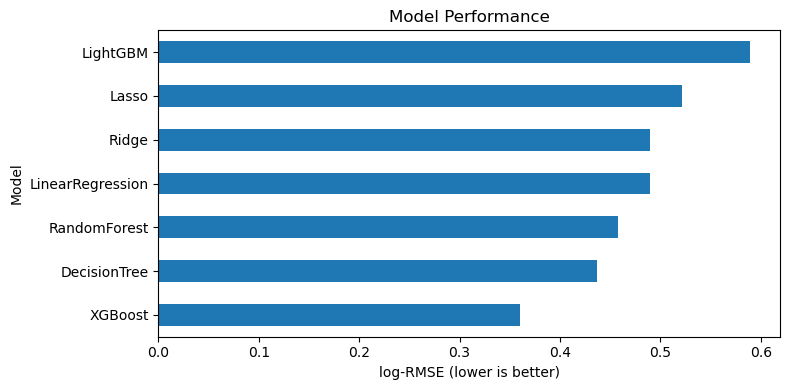

,Model,log-RMSE (mean),log-RMSE (std),RMSE (sec)
6,XGBoost,0.360218,0.001531,0.434
3,DecisionTree,0.437373,0.002637,0.549
4,RandomForest,0.457962,0.009677,0.581
0,LinearRegression,0.489408,0.003945,0.631
1,Ridge,0.489412,0.003945,0.631
2,Lasso,0.521536,0.002148,0.685
5,LightGBM,0.589689,0.001884,0.803


In [10]:
compare_models_results(result_all_models_all_att, seconds=True)

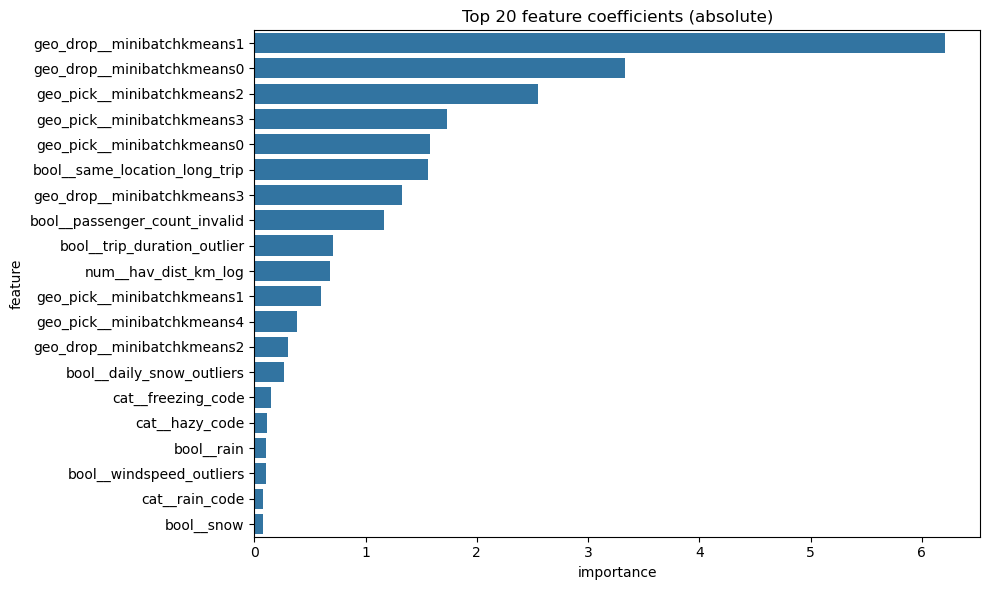

,feature,importance,sign
32,geo_drop__minibatchkmeans1,6.212284,-1.0
31,geo_drop__minibatchkmeans0,3.334143,1.0
28,geo_pick__minibatchkmeans2,2.545817,-1.0
29,geo_pick__minibatchkmeans3,1.730073,1.0
26,geo_pick__minibatchkmeans0,1.582419,1.0
43,bool__same_location_long_trip,1.562395,1.0
34,geo_drop__minibatchkmeans3,1.323567,1.0
42,bool__passenger_count_invalid,1.167523,-1.0
44,bool__trip_duration_outlier,0.704324,-1.0
1,num__hav_dist_km_log,0.679726,1.0


In [11]:
linreg_model = models_all['LinearRegression']
plot_lin_feature_importance(linreg_model, X_train_all, y_train)

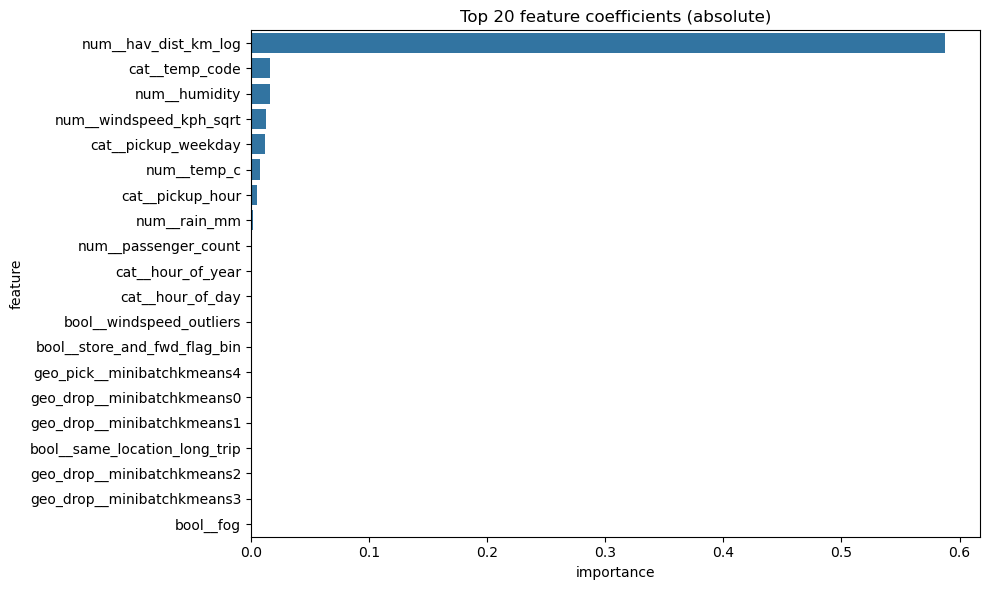

,feature,importance,sign
1,num__hav_dist_km_log,5.879418e-01,1.0
16,cat__temp_code,1.600600e-02,1.0
4,num__humidity,1.574294e-02,-1.0
3,num__windspeed_kph_sqrt,1.293801e-02,1.0
10,cat__pickup_weekday,1.225227e-02,-1.0
2,num__temp_c,7.317398e-03,1.0
13,cat__pickup_hour,5.367783e-03,1.0
6,num__rain_mm,2.009105e-03,1.0
0,num__passenger_count,3.178061e-04,1.0
14,cat__hour_of_year,6.970743e-06,1.0


In [12]:
lasso_model = models_all['Lasso']
plot_lin_feature_importance(lasso_model, X_train_all, y_train)

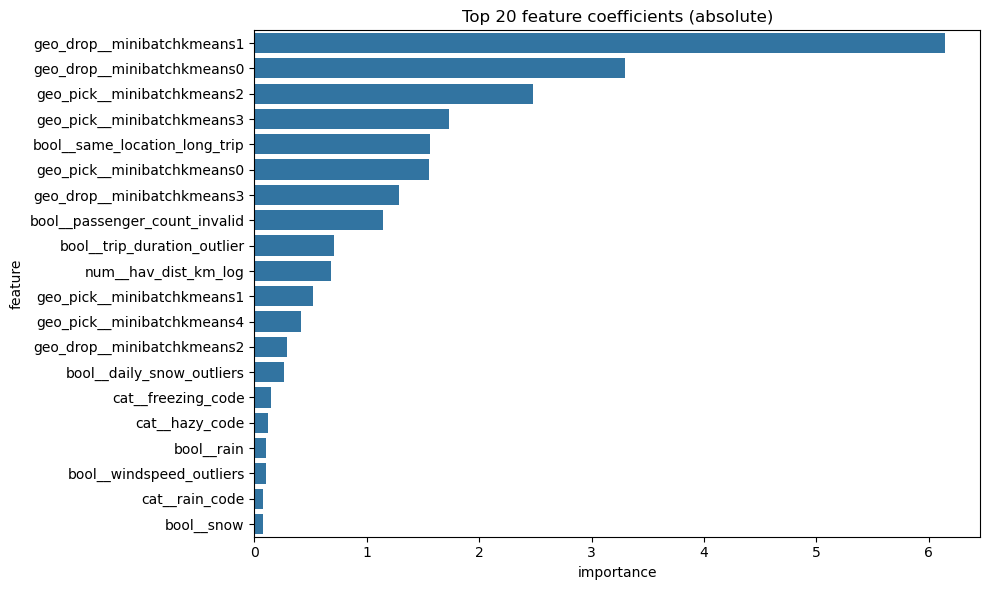

,feature,importance,sign
32,geo_drop__minibatchkmeans1,6.147045,-1.0
31,geo_drop__minibatchkmeans0,3.297249,1.0
28,geo_pick__minibatchkmeans2,2.475275,-1.0
29,geo_pick__minibatchkmeans3,1.729289,1.0
43,bool__same_location_long_trip,1.561483,1.0
26,geo_pick__minibatchkmeans0,1.557253,1.0
34,geo_drop__minibatchkmeans3,1.285887,1.0
42,bool__passenger_count_invalid,1.145176,-1.0
44,bool__trip_duration_outlier,0.704472,-1.0
1,num__hav_dist_km_log,0.679603,1.0


In [13]:
ridge_model = models_all['Ridge']
plot_lin_feature_importance(ridge_model, X_train_all, y_train)

NameError: name 'top_n' is not defined

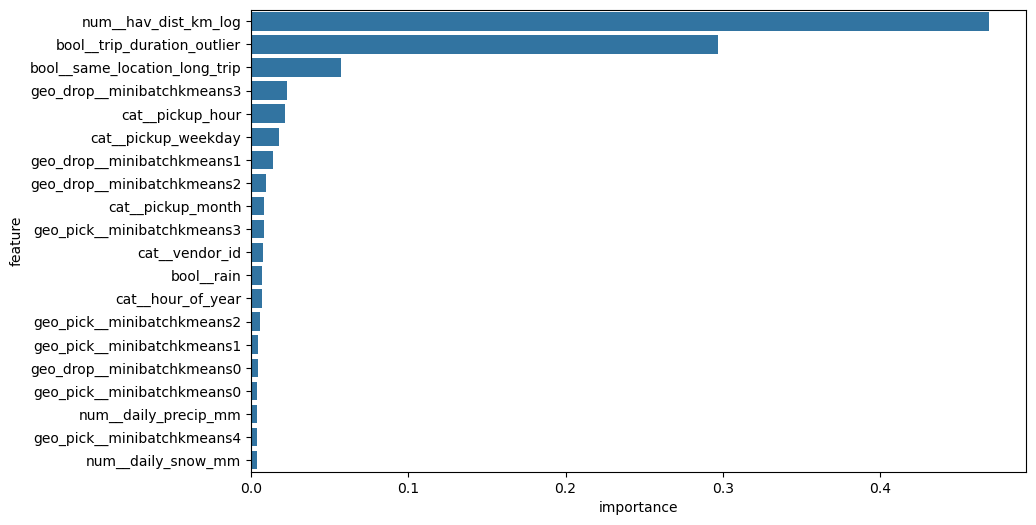

In [14]:
xgb_model = models_all['XGBoost']
plot_tree_feature_importance(xgb_model, X_train_all, y_train)

In [ ]:
lgbm_model = models_all['LightGBM']
plot_tree_feature_importance(lgbm_model, X_train_all, y_train)

NameError: name 'top_n' is not defined

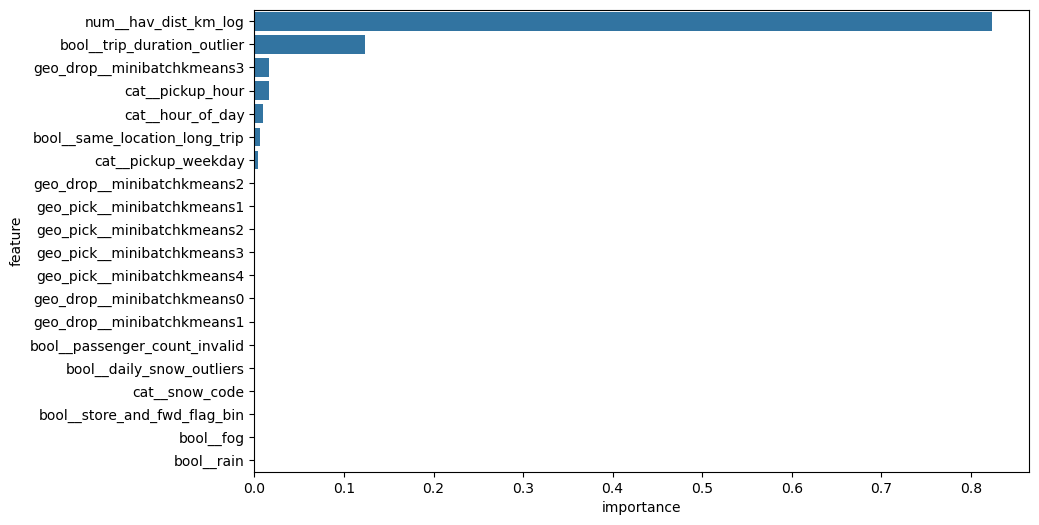

In [16]:
dt_model = models_all['DecisionTree']
plot_tree_feature_importance(dt_model, X_train_all, y_train)

NameError: name 'top_n' is not defined

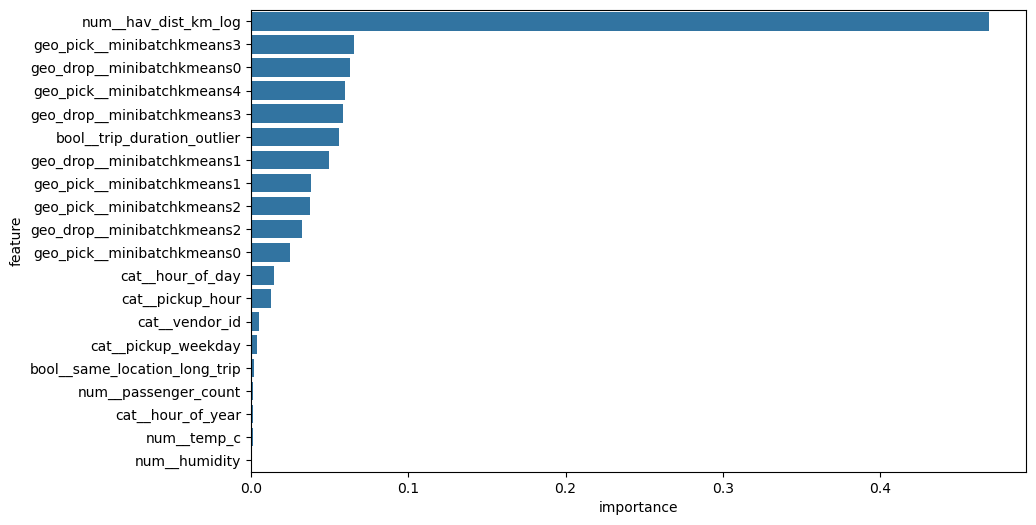

In [15]:
rf_model = models_all['RandomForest']
plot_tree_feature_importance(rf_model, X_train_all, y_train)

## All Models – No Weather Features

In [ ]:
preprocessing_no_weather = ColumnTransformer([
  ('num', num_base_pipeline, NUM_NO_WEATHER),
  ('cat', cat_base_pipeline, CAT_NO_WEATHER),
  ('geo_pick', geo_pick_base_pipeline, GEO_PICK),
  ('geo_drop', geo_drop_base_pipeline, GEO_DROP),
  ('bool', bool_base_pipeline, BOOL_NO_WEATHER)
])

X_train_no_weather = taxi_weather[
  NUM_NO_WEATHER + CAT_NO_WEATHER + GEO_PICK + GEO_DROP + BOOL_NO_WEATHER
  ]

models_no_weather = make_all_models(preprocessing_no_weather)

In [ ]:
result_all_models_no_weather = get_display_models_results(models_no_weather, X_train_no_weather,
                                                          y_train)

In [ ]:
compare_models_results(result_all_models_no_weather, seconds=True)